# Task 2 - Predict customer buying behaviour

In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
os.chdir('C:/Users/rutik/Downloads')

In [7]:
customer_data=pd.read_csv('customer_booking.csv')

In [8]:
customer_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [12]:
customer_data.shape

(50000, 14)

In [13]:
customer_data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
for column in customer_data.columns:
    customer_data[column] = label_encoder.fit_transform(customer_data[column])

# Feature Selection

In [19]:
X= customer_data.drop('booking_complete',axis=1)
y= customer_data.booking_complete 

In [20]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052465
booking_origin           0.043601
flight_duration          0.019531
trip_type                0.007962
length_of_stay           0.007910
wants_extra_baggage      0.005795
wants_preferred_seat     0.003140
flight_hour              0.002238
wants_in_flight_meals    0.001554
purchase_lead            0.001224
sales_channel            0.000780
flight_day               0.000430
num_passengers           0.000000
Name: MI Scores, dtype: float64

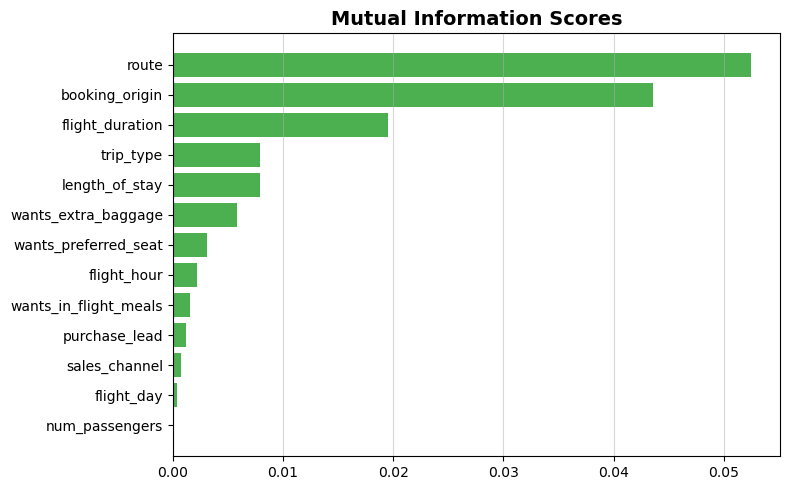

In [25]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
    ax.barh(width, scores, color='#4CAF50')
    ax.set_yticks(width)
    ax.set_yticklabels(ticks, fontsize=10)
    ax.set_title("Mutual Information Scores", fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plot_mi_scores(mi_scores)


#So from above it can be observe that
route
booking_origin
flight_duration
wants_extra_baggage
length_of_stay
wants_extra_baggage

are the important features for target booking_complete.


While 
sales_channel,flight_day,num_passengers not much related with our data so we will remove this

In [26]:
customer_data= customer_data.drop(columns=(['sales_channel']))
customer_data= customer_data.drop(columns=(['flight_day']))
customer_data= customer_data.drop(columns=(['num_passengers']))

In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   trip_type              50000 non-null  int32
 1   purchase_lead          50000 non-null  int64
 2   length_of_stay         50000 non-null  int64
 3   flight_hour            50000 non-null  int64
 4   route                  50000 non-null  int32
 5   booking_origin         50000 non-null  int32
 6   wants_extra_baggage    50000 non-null  int64
 7   wants_preferred_seat   50000 non-null  int64
 8   wants_in_flight_meals  50000 non-null  int64
 9   flight_duration        50000 non-null  int64
 10  booking_complete       50000 non-null  int64
dtypes: int32(3), int64(8)
memory usage: 3.6 MB


# Normalization

In [28]:
from sklearn import preprocessing

In [29]:
scaler = preprocessing.MinMaxScaler()

In [31]:
names = customer_data.columns

In [32]:
d = scaler.fit_transform(customer_data)
df_transformed = pd.DataFrame(d, columns=names)
df_transformed.head()

,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.0,0.558635,0.026946,0.304348,0.0,0.592233,1.0,0.0,0.0,0.4,0.0
1,1.0,0.238806,0.029940,0.130435,0.0,0.592233,0.0,0.0,0.0,0.4,0.0
2,1.0,0.518124,0.035928,0.739130,0.0,0.349515,1.0,1.0,0.0,0.4,0.0
3,1.0,0.204691,0.062874,0.173913,0.0,0.592233,0.0,0.0,1.0,0.4,0.0
4,1.0,0.144989,0.035928,0.652174,0.0,0.349515,1.0,0.0,1.0,0.4,0.0


In [33]:
# select independent variables
X = df_transformed.drop(columns='booking_complete')

# select dependent variables
y = df_transformed.loc[:, 'booking_complete']

In [35]:
# importing necessary libraries

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,auc,f1_score,plot_confusion_matrix,precision_score,recall_score

In [36]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    )

In [38]:
# Randforest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf=RandomForestClassifier()

In [40]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred2_test=clf.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred2_test))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      8455
         1.0       0.50      0.16      0.24      1545

    accuracy                           0.85     10000
   macro avg       0.68      0.56      0.58     10000
weighted avg       0.81      0.85      0.81     10000



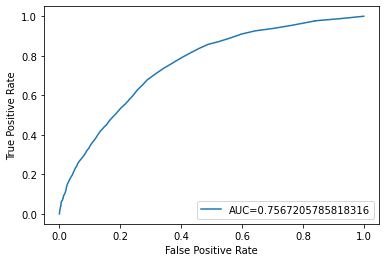

In [43]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()